In [1]:
import matplotlib.pyplot as plt # plotting library
import numpy as np # library for numerical calculations
import pandas as pd # library for reading csv files

In [2]:
data = pd.read_csv("filtered.csv")
data.head()

,track_genretop,track_acousticness,track_danceability,track_energy,track_instrumentalness,track_liveness,track_speechiness,track_tempo,track_valence
0,Hip-Hop,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,Hip-Hop,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,Hip-Hop,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,Pop,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,Hip-Hop,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


<AxesSubplot:xlabel='count', ylabel='track_genretop'>

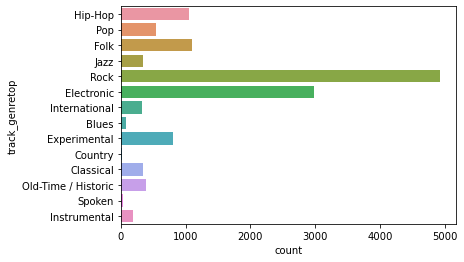

In [3]:
import seaborn as sns

sns.countplot(y="track_genretop", data=data)

In [4]:
data.dtypes

track_genretop             object
track_acousticness        float64
track_danceability        float64
track_energy              float64
track_instrumentalness    float64
track_liveness            float64
track_speechiness         float64
track_tempo               float64
track_valence             float64
dtype: object

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('track_genretop',1), 
                                                    data['track_genretop'],
                                                    test_size=0.3,
                                                    random_state=0) 

In [5]:
from sklearn.preprocessing import MinMaxScaler
 
x_scaler = MinMaxScaler() 
x_scaler.fit(X_train)

X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

<AxesSubplot:xlabel='count', ylabel='track_genretop'>

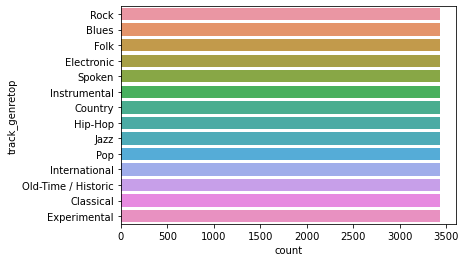

In [6]:
from sklearn.utils import resample

X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
Blues = X[X.track_genretop == "Blues"]
Rock = X[X.track_genretop == "Rock"]
Folk = X[X.track_genretop == "Folk"]
Electronic = X[X.track_genretop == "Electronic"]
Spoken = X[X.track_genretop == "Spoken"]
Instrumental = X[X.track_genretop == "Instrumental"]
Country = X[X.track_genretop == "Country"]
Hiphop = X[X.track_genretop == "Hip-Hop"]
Jazz = X[X.track_genretop == "Jazz"]
Pop = X[X.track_genretop == "Pop"]
International = X[X.track_genretop == "International"]
OH = X[X.track_genretop == "Old-Time / Historic"]
Classical = X[X.track_genretop == "Classical"]
Experimental = X[X.track_genretop == "Experimental"]

# Upsample
Blues_upsampled = resample(Blues,
                          replace=True, 
                          n_samples=len(Rock), 
                          random_state=0)

Folk_upsampled = resample(Folk,
                          replace=True, 
                          n_samples=len(Rock), 
                          random_state=0)

Electronic_upsampled = resample(Electronic,
                          replace=True, 
                          n_samples=len(Rock), 
                          random_state=0)

Spoken_upsampled = resample(Spoken,
                          replace=True, 
                          n_samples=len(Rock), 
                          random_state=0)

Instrumental_upsampled = resample(Instrumental,
                          replace=True, 
                          n_samples=len(Rock), 
                          random_state=0)

Country_upsampled = resample(Country,
                          replace=True, 
                          n_samples=len(Rock), 
                          random_state=0)

Hiphop_upsampled = resample(Hiphop,
                          replace=True, 
                          n_samples=len(Rock), 
                          random_state=0)

Jazz_upsampled = resample(Jazz,
                          replace=True, 
                          n_samples=len(Rock), 
                          random_state=0)

Pop_upsampled = resample(Pop,
                          replace=True, 
                          n_samples=len(Rock), 
                          random_state=0)

International_upsampled = resample(International,
                          replace=True, 
                          n_samples=len(Rock), 
                          random_state=0)

OH_upsampled = resample(OH,
                          replace=True, 
                          n_samples=len(Rock), 
                          random_state=0)

Classical_upsampled = resample(Classical,
                          replace=True, 
                          n_samples=len(Rock), 
                          random_state=0)

Experimental_upsampled = resample(Experimental,
                          replace=True, 
                          n_samples=len(Rock), 
                          random_state=0)

upsampled = pd.concat([Rock,Blues_upsampled,Folk_upsampled,Electronic_upsampled,Spoken_upsampled,Instrumental_upsampled,Country_upsampled,Hiphop_upsampled,Jazz_upsampled,Pop_upsampled,International_upsampled,OH_upsampled,Classical_upsampled,Experimental_upsampled])

sns.countplot(y="track_genretop", data=upsampled)

In [12]:
y_train_oversampled = upsampled.track_genretop
X_train_oversampled = upsampled.drop('track_genretop', axis=1)

x_oversampled_scaler = MinMaxScaler() 
x_oversampled_scaler.fit(X_train_oversampled)

X_train_oversampled_norm = x_scaler.transform(X_train_oversampled)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_on_training_set(y_test, y_pred):
    
  print(classification_report(y_test,  y_pred, zero_division=0))
  print(confusion_matrix(y_test,y_pred))

In [15]:
# Method 1: Decision Tree
from sklearn import tree

model01 = tree.DecisionTreeClassifier(max_depth=5) 

model01.fit(X_train,y_train)

y_pred = model01.predict(X_test)
evaluate_on_training_set(y_test, y_pred)

                     precision    recall  f1-score   support

              Blues       0.00      0.00      0.00        20
          Classical       0.40      0.33      0.36        94
            Country       0.00      0.00      0.00         3
         Electronic       0.45      0.56      0.50       904
       Experimental       0.00      0.00      0.00       246
               Folk       0.39      0.33      0.36       325
            Hip-Hop       0.51      0.38      0.43       335
       Instrumental       0.00      0.00      0.00        56
      International       0.00      0.00      0.00        84
               Jazz       0.00      0.00      0.00        94
Old-Time / Historic       0.74      0.78      0.76       119
                Pop       0.00      0.00      0.00       150
               Rock       0.55      0.77      0.64      1493
             Spoken       0.00      0.00      0.00         8

           accuracy                           0.51      3931
          macro avg   

In [26]:
from sklearn import tree

model01 = tree.DecisionTreeClassifier(max_depth=44) 

model01.fit(X_train_oversampled,y_train_oversampled)

y_pred = model01.predict(X_test)
evaluate_on_training_set(y_test, y_pred)

                     precision    recall  f1-score   support

              Blues       0.03      0.05      0.04        20
          Classical       0.33      0.43      0.37        94
            Country       0.00      0.00      0.00         3
         Electronic       0.38      0.31      0.34       904
       Experimental       0.10      0.11      0.11       246
               Folk       0.20      0.22      0.21       325
            Hip-Hop       0.36      0.33      0.35       335
       Instrumental       0.09      0.09      0.09        56
      International       0.08      0.12      0.10        84
               Jazz       0.07      0.10      0.08        94
Old-Time / Historic       0.70      0.73      0.72       119
                Pop       0.06      0.07      0.06       150
               Rock       0.52      0.52      0.52      1493
             Spoken       0.00      0.00      0.00         8

           accuracy                           0.36      3931
          macro avg   

In [64]:
# Method 2 : K neighbors
from sklearn.neighbors import KNeighborsClassifier

model02 = KNeighborsClassifier(n_neighbors=13)

model02.fit(X_train_norm, y_train) 

y_pred = model02.predict(X_test_norm)
evaluate_on_training_set(y_test, y_pred)

                     precision    recall  f1-score   support

              Blues       0.00      0.00      0.00        20
          Classical       0.37      0.59      0.46        94
            Country       0.00      0.00      0.00         3
         Electronic       0.45      0.52      0.48       904
       Experimental       0.07      0.01      0.01       246
               Folk       0.32      0.28      0.30       325
            Hip-Hop       0.56      0.34      0.42       335
       Instrumental       0.00      0.00      0.00        56
      International       0.24      0.05      0.08        84
               Jazz       0.30      0.03      0.06        94
Old-Time / Historic       0.67      0.71      0.69       119
                Pop       0.33      0.03      0.05       150
               Rock       0.55      0.75      0.63      1493
             Spoken       0.00      0.00      0.00         8

           accuracy                           0.50      3931
          macro avg   

In [36]:
from sklearn.neighbors import KNeighborsClassifier

model02 = KNeighborsClassifier(n_neighbors=200)

model02.fit(X_train_oversampled_norm, y_train_oversampled) 

y_pred = model02.predict(X_test_norm)
evaluate_on_training_set(y_test, y_pred)

                     precision    recall  f1-score   support

              Blues       0.01      0.35      0.03        20
          Classical       0.26      0.59      0.36        94
            Country       0.00      0.00      0.00         3
         Electronic       0.55      0.25      0.34       904
       Experimental       0.11      0.10      0.11       246
               Folk       0.23      0.11      0.15       325
            Hip-Hop       0.46      0.41      0.43       335
       Instrumental       0.03      0.18      0.05        56
      International       0.09      0.20      0.13        84
               Jazz       0.04      0.10      0.06        94
Old-Time / Historic       0.49      0.79      0.60       119
                Pop       0.06      0.12      0.08       150
               Rock       0.72      0.24      0.36      1493
             Spoken       0.00      0.12      0.01         8

           accuracy                           0.25      3931
          macro avg   

In [76]:
# Method 3 : AdaBoost
from sklearn.ensemble import AdaBoostClassifier
model03 = AdaBoostClassifier(n_estimators=300, learning_rate=0.1)

model03.fit(X_train_norm, y_train) 

y_pred = model03.predict(X_test_norm) 
evaluate_on_training_set(y_test, y_pred)

                     precision    recall  f1-score   support

              Blues       0.00      0.00      0.00        20
          Classical       0.69      0.12      0.20        94
            Country       0.00      0.00      0.00         3
         Electronic       0.51      0.37      0.43       904
       Experimental       0.00      0.00      0.00       246
               Folk       0.27      0.20      0.23       325
            Hip-Hop       0.56      0.15      0.24       335
       Instrumental       0.00      0.00      0.00        56
      International       0.00      0.00      0.00        84
               Jazz       0.10      0.01      0.02        94
Old-Time / Historic       0.49      0.76      0.60       119
                Pop       0.00      0.00      0.00       150
               Rock       0.48      0.88      0.62      1493
             Spoken       0.00      0.00      0.00         8

           accuracy                           0.47      3931
          macro avg   

In [41]:
from sklearn.ensemble import AdaBoostClassifier
model03 = AdaBoostClassifier(n_estimators=300, learning_rate=0.1)

model03.fit(X_train_oversampled_norm, y_train_oversampled) 

y_pred = model03.predict(X_test_norm) 
evaluate_on_training_set(y_test, y_pred)

                     precision    recall  f1-score   support

              Blues       0.02      0.50      0.04        20
          Classical       0.42      0.26      0.32        94
            Country       0.00      0.00      0.00         3
         Electronic       0.43      0.19      0.26       904
       Experimental       0.13      0.09      0.11       246
               Folk       0.20      0.09      0.12       325
            Hip-Hop       0.31      0.51      0.39       335
       Instrumental       0.01      0.05      0.02        56
      International       0.03      0.07      0.05        84
               Jazz       0.04      0.11      0.06        94
Old-Time / Historic       0.44      0.78      0.57       119
                Pop       0.09      0.13      0.11       150
               Rock       0.68      0.34      0.46      1493
             Spoken       0.00      0.00      0.00         8

           accuracy                           0.27      3931
          macro avg   

In [83]:
# Method 4 : RandomForest
from sklearn.ensemble import RandomForestClassifier
model04 = RandomForestClassifier(n_estimators = 400)

model04.fit(X_train,y_train)
y_pred = model04.predict(X_test)
evaluate_on_training_set(y_test,y_pred)

                     precision    recall  f1-score   support

              Blues       0.00      0.00      0.00        20
          Classical       0.60      0.60      0.60        94
            Country       0.00      0.00      0.00         3
         Electronic       0.50      0.58      0.53       904
       Experimental       0.73      0.03      0.06       246
               Folk       0.43      0.31      0.36       325
            Hip-Hop       0.61      0.46      0.53       335
       Instrumental       0.00      0.00      0.00        56
      International       0.71      0.06      0.11        84
               Jazz       0.20      0.01      0.02        94
Old-Time / Historic       0.78      0.88      0.83       119
                Pop       0.00      0.00      0.00       150
               Rock       0.56      0.80      0.66      1493
             Spoken       0.00      0.00      0.00         8

           accuracy                           0.55      3931
          macro avg   

In [45]:
from sklearn.ensemble import RandomForestClassifier
model04 = RandomForestClassifier(n_estimators = 400)

model04.fit(X_train_oversampled,y_train_oversampled)
y_pred = model04.predict(X_test)
evaluate_on_training_set(y_test,y_pred)

                     precision    recall  f1-score   support

              Blues       0.50      0.05      0.09        20
          Classical       0.55      0.60      0.57        94
            Country       0.00      0.00      0.00         3
         Electronic       0.52      0.53      0.53       904
       Experimental       0.28      0.04      0.08       246
               Folk       0.37      0.39      0.38       325
            Hip-Hop       0.55      0.50      0.52       335
       Instrumental       0.00      0.00      0.00        56
      International       0.42      0.12      0.19        84
               Jazz       0.18      0.04      0.07        94
Old-Time / Historic       0.76      0.89      0.82       119
                Pop       0.15      0.02      0.04       150
               Rock       0.57      0.78      0.66      1493
             Spoken       0.00      0.00      0.00         8

           accuracy                           0.54      3931
          macro avg   

In [88]:
# Method 5: Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

model05 = GaussianNB()

model05.fit(X_train_norm, y_train) 

y_pred = model05.predict(X_test_norm) 
evaluate_on_training_set(y_test, y_pred)

                     precision    recall  f1-score   support

              Blues       0.00      0.00      0.00        20
          Classical       0.21      0.62      0.31        94
            Country       0.00      0.00      0.00         3
         Electronic       0.51      0.45      0.48       904
       Experimental       0.00      0.00      0.00       246
               Folk       0.28      0.39      0.33       325
            Hip-Hop       0.43      0.43      0.43       335
       Instrumental       0.00      0.00      0.00        56
      International       0.08      0.05      0.06        84
               Jazz       0.00      0.00      0.00        94
Old-Time / Historic       0.48      0.58      0.52       119
                Pop       0.00      0.00      0.00       150
               Rock       0.57      0.72      0.64      1493
             Spoken       0.00      0.00      0.00         8

           accuracy                           0.48      3931
          macro avg   

In [46]:
from sklearn.naive_bayes import GaussianNB

model05 = GaussianNB()

model05.fit(X_train_oversampled_norm, y_train_oversampled) 

y_pred = model05.predict(X_test_norm) 
evaluate_on_training_set(y_test, y_pred)

                     precision    recall  f1-score   support

              Blues       0.00      0.00      0.00        20
          Classical       0.14      0.69      0.24        94
            Country       0.00      0.67      0.00         3
         Electronic       0.58      0.33      0.42       904
       Experimental       0.00      0.00      0.00       246
               Folk       0.11      0.02      0.03       325
            Hip-Hop       0.42      0.44      0.43       335
       Instrumental       0.04      0.04      0.04        56
      International       0.08      0.10      0.09        84
               Jazz       0.04      0.05      0.04        94
Old-Time / Historic       0.40      0.58      0.47       119
                Pop       0.06      0.19      0.09       150
               Rock       0.74      0.22      0.34      1493
             Spoken       0.00      0.00      0.00         8

           accuracy                           0.24      3931
          macro avg   